# Introduction

I downloaded a dataset of apple quality on kaggle : https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

The goal is to predict if an apple is good or bad

# Import libraries

In [51]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt

In [52]:
apple = pd.read_csv(os.path.join("apple_quality", "apple_quality.csv"))

In [53]:
apple.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [54]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
apple["Acidity"].value_counts()

In [ ]:
apple.describe()

In [ ]:
apple.hist(bins = 50, figsize=(15,15))

In [55]:
missing_values = apple.isnull().sum()
print(missing_values)

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


In [61]:
# Supprimer les lignes contenant des valeurs nulles
apple_cleaned = apple.dropna()

# Afficher le nombre de lignes après suppression des valeurs nulles
print("Nombre de lignes après suppression des valeurs nulles :", len(apple_cleaned))

Nombre de lignes après suppression des valeurs nulles : 4000


In [62]:
apple_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 312.5+ KB


In [63]:
apple_cleaned["Acidity"]

0      -0.491590
1      -0.722809
2       2.621636
3       0.790723
4       0.501984
          ...   
3995    0.137784
3996    1.854235
3997   -1.334611
3998   -2.229720
3999    1.599796
Name: Acidity, Length: 4000, dtype: float64

In [64]:
# Convertir la colonne "Acidity" en type numérique
apple['Acidity'] = pd.to_numeric(apple['Acidity'], errors='coerce')

In [65]:
apple["Quality"]

0       good
1       good
2        bad
3       good
4       good
        ... 
3996    good
3997     bad
3998    good
3999    good
4000     NaN
Name: Quality, Length: 4001, dtype: object

# Test and train set

In [78]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(apple_cleaned, apple_cleaned["Quality"]):
    train_set = apple_cleaned.loc[train_index]
    test_set = apple_cleaned.loc[test_index]

In [66]:
len(train_set)

3200

In [68]:
test_set["Quality"].value_counts() / len(test_set)

Series([], Name: count, dtype: float64)

In [69]:
train_set["Quality"].value_counts() / len(train_set)

Quality
good    0.500938
bad     0.499063
Name: count, dtype: float64

In [70]:
apple_cleaned["Quality"].value_counts() / len(apple_cleaned)

Quality
good    0.501
bad     0.499
Name: count, dtype: float64

The repartition is good

In [71]:
def income_cat_proportions(data):
    return data["Quality"].value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(apple_cleaned),
    "Stratified": income_cat_proportions(train_set),
    "Random": income_cat_proportions(train_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [72]:
compare_props

Overall  Stratified    Random  Rand. %error  Strat. %error
Quality                                                            
bad        0.499    0.499063  0.499063      0.012525       0.012525
good       0.501    0.500938  0.500938     -0.012475      -0.012475

# Let's discover our datas !!

In [73]:
apple_train = train_set.copy()

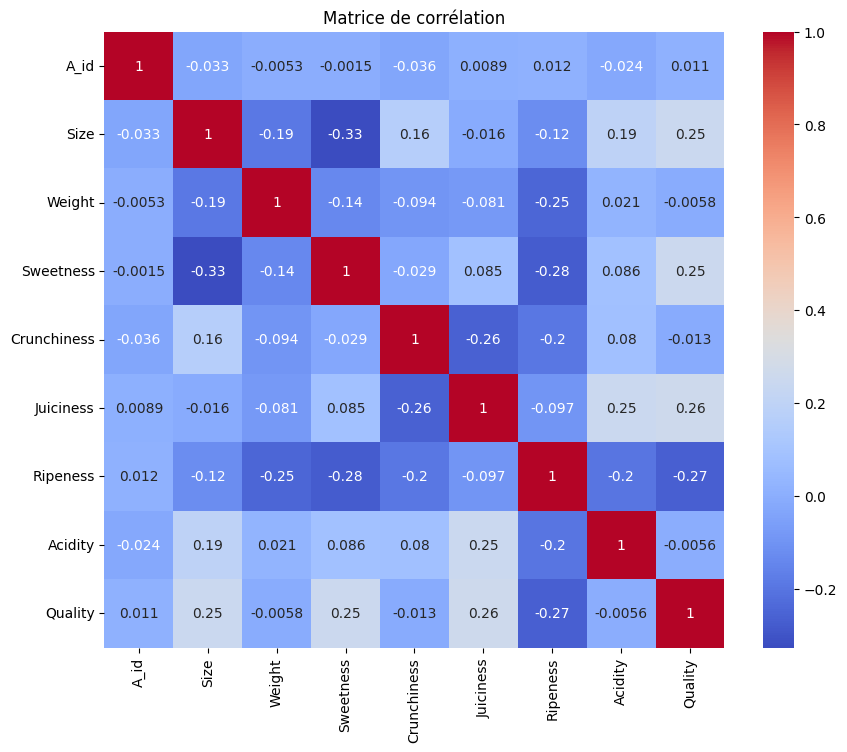

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un dictionnaire de mapping
quality_mapping = {'good': 1, 'bad': 0}

# Appliquer le mapping à la colonne Quality
apple_train['Quality'] = apple_train['Quality'].map(quality_mapping)

# Maintenant, vous pouvez calculer la matrice de corrélation
correlation_matrix = apple_train.corr()

# Tracer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()



In [18]:
correlation_matrix["Quality"].sort_values(ascending = False)

Quality        1.000000
Juiciness      0.261178
Sweetness      0.252653
Size           0.247533
A_id           0.011098
Acidity       -0.005602
Weight        -0.005757
Crunchiness   -0.013162
Ripeness      -0.266937
Name: Quality, dtype: float64

So here we can see which features can help us to predict the quality of an apple. We could have guessed it but the juice, the sweetness, the size and the ripeness are correlated. In my mind, acidity and crunchiness would have played a bigger role.

array([[<Axes: xlabel='Quality', ylabel='Quality'>,
        <Axes: xlabel='Juiciness', ylabel='Quality'>,
        <Axes: xlabel='Sweetness', ylabel='Quality'>,
        <Axes: xlabel='Size', ylabel='Quality'>,
        <Axes: xlabel='Ripeness', ylabel='Quality'>],
       [<Axes: xlabel='Quality', ylabel='Juiciness'>,
        <Axes: xlabel='Juiciness', ylabel='Juiciness'>,
        <Axes: xlabel='Sweetness', ylabel='Juiciness'>,
        <Axes: xlabel='Size', ylabel='Juiciness'>,
        <Axes: xlabel='Ripeness', ylabel='Juiciness'>],
       [<Axes: xlabel='Quality', ylabel='Sweetness'>,
        <Axes: xlabel='Juiciness', ylabel='Sweetness'>,
        <Axes: xlabel='Sweetness', ylabel='Sweetness'>,
        <Axes: xlabel='Size', ylabel='Sweetness'>,
        <Axes: xlabel='Ripeness', ylabel='Sweetness'>],
       [<Axes: xlabel='Quality', ylabel='Size'>,
        <Axes: xlabel='Juiciness', ylabel='Size'>,
        <Axes: xlabel='Sweetness', ylabel='Size'>,
        <Axes: xlabel='Size', ylabel='Si

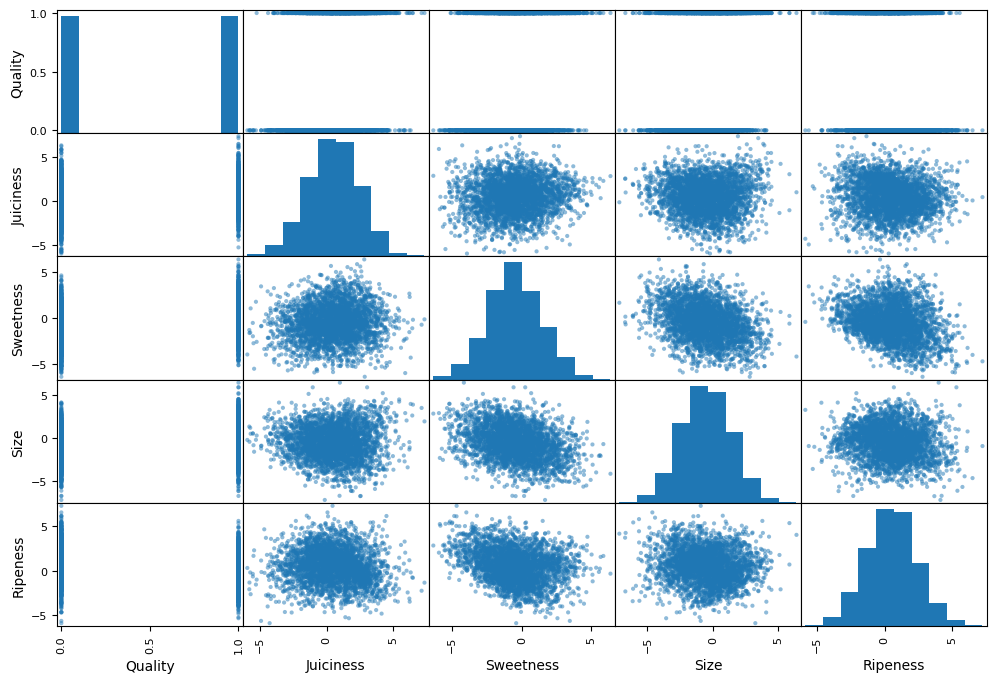

In [19]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["Quality", "Juiciness", "Sweetness",
              "Size", "Ripeness" ]
scatter_matrix(apple_train[attributes], figsize=(12, 8))

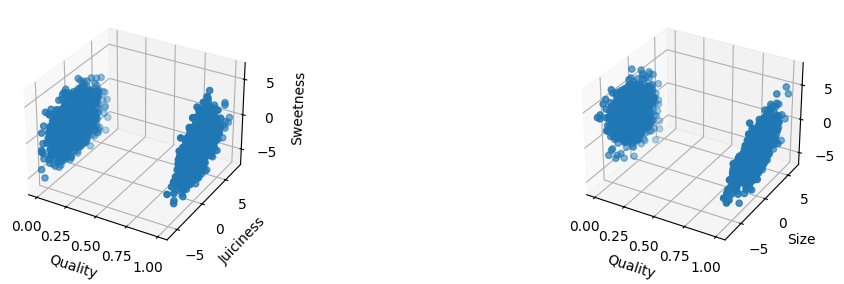

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Création de la figure
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Liste des combinaisons de variables
combinations = [("Quality", "Juiciness", "Sweetness"),
                ("Quality", "Size", "Ripeness")]

# Boucle sur les combinaisons pour créer les graphiques 3D
for i, combo in enumerate(combinations, start=1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.scatter(apple_train[combo[0]], apple_train[combo[1]], apple_train[combo[2]])
    ax.set_xlabel(combo[0])
    ax.set_ylabel(combo[1])
    ax.set_zlabel(combo[2])

plt.show()


# Test attribute combinations

In [21]:
apple_train["Ratio Juice Sweet"] = apple_train["Juiciness"]/apple_train["Sweetness"]
apple_train["Ratio Juice size"] = apple_train["Juiciness"]/apple_train["Size"]
apple_train["Ratio Juice Ripeness"] = apple_train["Juiciness"]/apple_train["Ripeness"]
apple_train["Ratio Sweet Size"] = apple_train["Sweetness"]/apple_train["Size"]

apple_train["Ratio Sweet Ripeness"] = apple_train["Sweetness"]/apple_train["Ripeness"]

apple_train["Ratio Size Ripeness"] = apple_train["Size"]/apple_train["Ripeness"]

In [22]:
corr_matrix = apple_train.corr()
corr_matrix["Quality"].sort_values(ascending=False)

Quality                 1.000000
Juiciness               0.261178
Sweetness               0.252653
Size                    0.247533
Ratio Size Ripeness     0.022515
Ratio Sweet Size        0.017230
Ratio Juice size        0.017197
Ratio Sweet Ripeness    0.014445
A_id                    0.011098
Acidity                -0.005602
Weight                 -0.005757
Crunchiness            -0.013162
Ratio Juice Sweet      -0.014348
Ratio Juice Ripeness   -0.020113
Ripeness               -0.266937
Name: Quality, dtype: float64

No need to create attributes

In [23]:
# Liste des attributs à supprimer
attributs_a_supprimer = ["Ratio Juice Sweet", "Ratio Juice size", "Ratio Juice Ripeness",
                         "Ratio Sweet Size", "Ratio Sweet Ripeness", "Ratio Size Ripeness"]

# Supprimer les attributs de l'ensemble d'entraînement
apple_train.drop(attributs_a_supprimer, axis=1, inplace=True)

# Supprimer les attributs de l'ensemble de test si nécessaire
# apple_test.drop(attributs_a_supprimer, axis=1, inplace=True)


# Prepare the data for machine learning

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Séparation des caractéristiques et de la cible
apple = apple_train.drop("Quality", axis=1)
apple_label = apple_train["Quality"].copy()

No need to clean the data as it's from kaggle, I've already removed one apple that had missing attributes

In [25]:
sample_incomplete_rows = apple[apple.isnull().any(axis=1)].head()
sample_incomplete_rows

Empty DataFrame
Columns: [A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity]
Index: []

Cool !

In [26]:
apple['Acidity'] = pd.to_numeric(apple['Acidity'], errors='coerce')

Acidity was an object type so I had to change it for float

In [27]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3200 entries, 337 to 2040
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         3200 non-null   float64
 1   Size         3200 non-null   float64
 2   Weight       3200 non-null   float64
 3   Sweetness    3200 non-null   float64
 4   Crunchiness  3200 non-null   float64
 5   Juiciness    3200 non-null   float64
 6   Ripeness     3200 non-null   float64
 7   Acidity      3200 non-null   float64
dtypes: float64(8)
memory usage: 225.0 KB


In [28]:
numeric_features = apple.select_dtypes(include=['float64']).columns
numeric_transformer = Pipeline([
    ('passthrough', 'passthrough')  # No need to change anything as it's already cleaned
])

# Appliquer les transformations sur les caractéristiques
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])


# Appliquer les transformations sur les données
apple_prepared = preprocessor.fit_transform(apple)


In [29]:
transformed_numeric_feature_names = numeric_features
print(transformed_numeric_feature_names)


Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity'],
      dtype='object')


In [30]:
apple_prepared

array([[ 3.37000000e+02, -1.01153336e+00,  2.30828862e+00, ...,
         1.41136719e+00, -5.19966292e+00,  2.62155230e+00],
       [ 1.09600000e+03, -9.30772193e-01, -1.13028606e+00, ...,
        -1.57523100e+00,  2.59948342e-01, -1.20065997e+00],
       [ 1.79900000e+03, -1.62232796e+00,  2.26613939e+00, ...,
         1.83409004e+00, -1.35104701e+00,  2.70635836e+00],
       ...,
       [ 3.23900000e+03,  1.09009318e-01,  5.94729940e-02, ...,
        -3.69673688e+00,  1.10827922e+00, -2.74245844e+00],
       [ 5.73000000e+02,  3.50474098e+00, -5.47868222e+00, ...,
         1.90838323e+00,  1.91057271e+00,  2.44501385e+00],
       [ 2.04000000e+03, -5.19382426e-01, -2.40905224e+00, ...,
         2.12126937e+00, -1.97834391e+00, -8.33745400e-02]])

In [31]:
apple_prepared.shape

(3200, 8)

Good !

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Définir les classifieurs à tester
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier()
}

# Évaluer les performances de chaque classifieur en utilisant la validation croisée
for name, clf in classifiers.items():
    scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='accuracy')
    print(f"{name}: Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression: Accuracy: 0.7381 (+/- 0.0194)
SVM: Accuracy: 0.4856 (+/- 0.0104)
Random Forest: Accuracy: 0.8800 (+/- 0.0172)
Gradient Boosting: Accuracy: 0.8622 (+/- 0.0159)
KNN: Accuracy: 0.5541 (+/- 0.0180)
Naive Bayes: Accuracy: 0.7541 (+/- 0.0166)
XGBoost: Accuracy: 0.8856 (+/- 0.0154)
[LightGBM] [Info] Number of positive: 1282, number of negative: 1278
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500781 -> initscore=0.003125
[LightGBM] [Info] Start training from score 0.003125
[LightGBM] [Info] Number of positive: 1282, number of negative: 1278
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remov

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Définir les classifieurs à tester
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier()
}

# Évaluer les performances de chaque classifieur en utilisant la validation croisée
for name, clf in classifiers.items():
    scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='precision')
    recall_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='recall')
    f1_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='f1')
    
    print(f"{name}: Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print(f"   Precision: {precision_scores.mean():.4f} (+/- {precision_scores.std():.4f})")
    print(f"   Recall: {recall_scores.mean():.4f} (+/- {recall_scores.std():.4f})")
    print(f"   F1-score: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression: Accuracy: 0.7381 (+/- 0.0194)
   Precision: 0.7385 (+/- 0.0225)
   Recall: 0.7398 (+/- 0.0287)
   F1-score: 0.7388 (+/- 0.0200)
SVM: Accuracy: 0.4856 (+/- 0.0104)
   Precision: 0.4840 (+/- 0.0121)
   Recall: 0.5219 (+/- 0.2157)
   F1-score: 0.4861 (+/- 0.0902)
Random Forest: Accuracy: 0.8819 (+/- 0.0155)
   Precision: 0.8690 (+/- 0.0199)
   Recall: 0.8908 (+/- 0.0132)
   F1-score: 0.8845 (+/- 0.0168)
Gradient Boosting: Accuracy: 0.8622 (+/- 0.0159)
   Precision: 0.8540 (+/- 0.0182)
   Recall: 0.8746 (+/- 0.0184)
   F1-score: 0.8641 (+/- 0.0156)
KNN: Accuracy: 0.5541 (+/- 0.0180)
   Precision: 0.5587 (+/- 0.0209)
   Recall: 0.5278 (+/- 0.0290)
   F1-score: 0.5422 (+/- 0.0193)
Naive Bayes: Accuracy: 0.7541 (+/- 0.0166)
   Precision: 0.7564 (+/- 0.0181)
   Recall: 0.7511 (+/- 0.0182)
   F1-score: 0.7537 (+/- 0.0165)
XGBoost: Accuracy: 0.8856 (+/- 0.0154)
   Precision: 0.8790 (+/- 0.0190)
   Recall: 0.8952 (+/- 0.0180)
   F1-score: 0.8869 (+/- 0.0153)
[LightGBM] [Info]

I'm going to chose CatBoost and Random Forest to fit the model and then I'll be able to see which one is really the best

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],   # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],   # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4]      # Nombre minimum d'échantillons requis à chaque feuille
}

# Initialiser le classifieur Random Forest
rf = RandomForestClassifier()

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Exécuter la recherche par grille sur les données d'entraînement
grid_search.fit(apple, apple_label)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Utiliser le modèle avec les meilleurs hyperparamètres pour faire des prédictions
best_rf = grid_search.best_estimator_


In [ ]:
clf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='accuracy')
precision_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='precision')
recall_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='recall')
f1_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='f1')

print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
print(f"Precision: {precision_scores.mean():.4f} (+/- {precision_scores.std():.4f})")
print(f"Recall: {recall_scores.mean():.4f} (+/- {recall_scores.std():.4f})")
print(f"F1-score: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Définir la distribution des hyperparamètres à rechercher
param_dist = {
    'n_estimators': randint(100, 1000),                # Nombre d'arbres dans la forêt
    'max_depth': [None] + list(range(1, 51, 5)),        # Profondeur maximale de chaque arbre
    'min_samples_split': randint(2, 20),                # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': randint(1, 20)                  # Nombre minimum d'échantillons requis à chaque feuille
}


# Initialiser le classifieur Random Forest
rf = RandomForestClassifier()

# Recherche aléatoire avec validation croisée
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

# Exécuter la recherche aléatoire sur les données d'entraînement
random_search.fit(apple, apple_label)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", random_search.best_params_)

# Utiliser le modèle avec les meilleurs hyperparamètres pour faire des prédictions
best_rf = random_search.best_estimator_


In [ ]:
clf = RandomForestClassifier(max_depth=21, min_samples_leaf=2, min_samples_split=2, n_estimators=559)
scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='accuracy')
precision_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='precision')
recall_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='recall')
f1_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='f1')

print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
print(f"Precision: {precision_scores.mean():.4f} (+/- {precision_scores.std():.4f})")
print(f"Recall: {recall_scores.mean():.4f} (+/- {recall_scores.std():.4f})")
print(f"F1-score: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")

In [ ]:
# Accuracy: 0.8838 (+/- 0.0167)
# Precision: 0.8692 (+/- 0.0160)
# Recall: 0.8908 (+/- 0.0173)
# F1-score: 0.8838 (+/- 0.0181)

# Accuracy: 0.8853 (+/- 0.0152)
# Precision: 0.8670 (+/- 0.0229)
# Recall: 0.8989 (+/- 0.0156)
# F1-score: 0.8822 (+/- 0.0158)

In [35]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

# Définir la grille des hyperparamètres à rechercher
param_grid = {
    'iterations': [100, 200, 300],       # Nombre d'itérations (arbres) dans le modèle CatBoost
    'learning_rate': [0.01, 0.05, 0.1],  # Taux d'apprentissage
    'depth': [6, 8, 10],                  # Profondeur de l'arbre
    'l2_leaf_reg': [1, 3, 5]              # Coefficient de régularisation L2
}

# Initialiser le classifieur CatBoost
catboost = CatBoostClassifier()

# Recherche par grille avec validation croisée
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Exécuter la recherche par grille sur les données d'entraînement
grid_search.fit(apple, apple_label)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# Utiliser le modèle avec les meilleurs hyperparamètres pour faire des prédictions
best_catboost = grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
0:	learn: 0.6897144	total: 5ms	remaining: 495ms
1:	learn: 0.6862149	total: 8.62ms	remaining: 422ms
2:	learn: 0.6834244	total: 12.6ms	remaining: 407ms
3:	learn: 0.6803435	total: 17ms	remaining: 409ms
4:	learn: 0.6777965	total: 21.5ms	remaining: 409ms
5:	learn: 0.6745315	total: 27.4ms	remaining: 429ms
6:	learn: 0.6723939	total: 30.1ms	remaining: 400ms
7:	learn: 0.6694880	total: 33.6ms	remaining: 387ms
8:	learn: 0.6666532	total: 37.4ms	remaining: 378ms
9:	learn: 0.6639624	total: 40.9ms	remaining: 368ms
10:	learn: 0.6609321	total: 46.7ms	remaining: 378ms
11:	learn: 0.6585180	total: 50.4ms	remaining: 370ms
12:	learn: 0.6556985	total: 54.2ms	remaining: 363ms
13:	learn: 0.6528840	total: 58.6ms	remaining: 360ms
14:	learn: 0.6500283	total: 62.6ms	remaining: 355ms
15:	learn: 0.6472293	total: 66.6ms	remaining: 350ms
16:	learn: 0.6444072	total: 69.6ms	remaining: 340ms
17:	learn: 0.6417036	total: 74ms	remaining: 337ms
18:	learn: 0.639232

In [34]:
clf = CatBoostClassifier(depth=8, iterations=300, l2_leaf_reg=5, learning_rate=0.1)
scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='accuracy')
precision_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='precision')
recall_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='recall')
f1_scores = cross_val_score(clf, apple, apple_label, cv=5, scoring='f1')

print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")
print(f"Precision: {precision_scores.mean():.4f} (+/- {precision_scores.std():.4f})")
print(f"Recall: {recall_scores.mean():.4f} (+/- {recall_scores.std():.4f})")
print(f"F1-score: {f1_scores.mean():.4f} (+/- {f1_scores.std():.4f})")

0:	learn: 0.6331736	total: 12.3ms	remaining: 3.67s
1:	learn: 0.5895532	total: 24.3ms	remaining: 3.63s
2:	learn: 0.5508170	total: 34.1ms	remaining: 3.37s
3:	learn: 0.5160222	total: 46.4ms	remaining: 3.44s
4:	learn: 0.4864140	total: 59.5ms	remaining: 3.51s
5:	learn: 0.4623857	total: 76.7ms	remaining: 3.76s
6:	learn: 0.4408421	total: 90.1ms	remaining: 3.77s
7:	learn: 0.4245295	total: 106ms	remaining: 3.86s
8:	learn: 0.4115825	total: 117ms	remaining: 3.79s
9:	learn: 0.3958240	total: 138ms	remaining: 4.01s
10:	learn: 0.3809999	total: 153ms	remaining: 4.01s
11:	learn: 0.3709587	total: 166ms	remaining: 3.98s
12:	learn: 0.3588952	total: 177ms	remaining: 3.9s
13:	learn: 0.3477518	total: 189ms	remaining: 3.86s
14:	learn: 0.3384429	total: 200ms	remaining: 3.8s
15:	learn: 0.3284883	total: 211ms	remaining: 3.75s
16:	learn: 0.3218864	total: 223ms	remaining: 3.71s
17:	learn: 0.3120218	total: 233ms	remaining: 3.65s
18:	learn: 0.3071601	total: 246ms	remaining: 3.64s
19:	learn: 0.3011576	total: 258ms	re

I'll keep this model

In [81]:
test_set

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
1911  1911.0 -1.234221 -0.242814   0.089992     1.525912   0.814106  0.186102   
1788  1788.0  1.523458 -2.410581  -2.873685     3.166517  -2.212093  0.407928   
3585  3585.0 -0.142390 -1.182126   1.720323     2.314596  -1.272217 -1.510105   
3982  3982.0 -2.434450  0.280785   0.426244     0.924208   1.439966  0.517793   
615    615.0  2.275232 -1.197066  -3.300744    -1.989807   3.369321  1.931644   
...      ...       ...       ...        ...          ...        ...       ...   
3277  3277.0  2.962386  0.457107  -3.513417     1.850766   0.120213  1.247077   
3534  3534.0  0.622590 -0.213581  -0.900257     2.120276   1.597765  0.491482   
800    800.0  0.599558 -2.156930  -0.504307     2.228545  -1.122551 -0.460467   
3494  3494.0  4.649923 -1.675508  -3.241841     5.333283  -4.830750 -3.811951   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   

       Acidity Quality  
1911 -2.553685    good  
1788 -0.068995    good  
3585  0.351050     bad  
3982 -2.334245    good  
615   2.191253    good  
...        ...     ...  
3277  1.086971    good  
3534 -1.172440     bad  
800  -1.604761     bad  
3494 -0.518725     bad  
1    -0.722809    good  

[800 rows x 9 columns]

In [82]:
apple_test_label

1911    good
1788    good
3585     bad
3982    good
615     good
        ... 
3277    good
3534     bad
800      bad
3494     bad
1       good
Name: Quality, Length: 800, dtype: object

In [83]:
quality_mapping = {'good': 1, 'bad': 0}

# Appliquer le mapping à la colonne Quality
test_set['Quality'] = test_set['Quality'].map(quality_mapping)

apple_test_label = test_set["Quality"].copy()

apple_test = test_set.drop(["Quality"], axis=1)


In [84]:
apple_test_label

1911    1
1788    1
3585    0
3982    1
615     1
       ..
3277    1
3534    0
800     0
3494    0
1       1
Name: Quality, Length: 800, dtype: int64

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

final_model = best_catboost


apple_test_prepared = preprocessor.fit_transform(apple_test)

final_predictions = final_model.predict(apple_test_prepared)

accuracy = accuracy_score(apple_test_label, final_predictions)
precision = precision_score(apple_test_label, final_predictions)
recall = recall_score(apple_test_label, final_predictions)
f1 = f1_score(apple_test_label, final_predictions)

# Afficher les métriques de performance
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8775
Precision: 0.8778
Recall: 0.8778
F1-score: 0.8778


# Save the model

In [86]:
import pickle

# Sauvegarder le modèle dans un fichier
with open('Apple_quality.pkl', 'wb') as file:
    pickle.dump(clf, file)

# Charger le modèle à partir du fichier
with open('Apple_quality.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


# I need to put more doc